In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import label

In [2]:
df = pd.read_csv('../../DATA/gene_expression.csv')

In [3]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

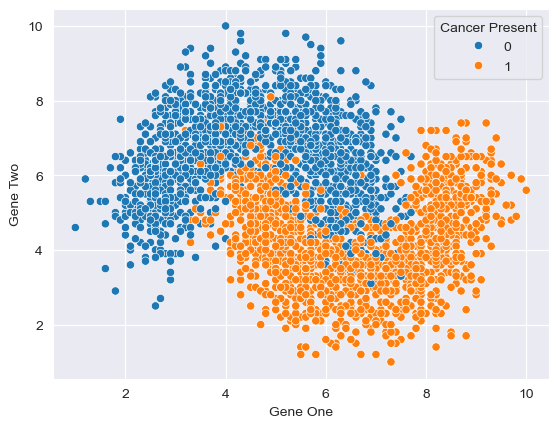

In [4]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')

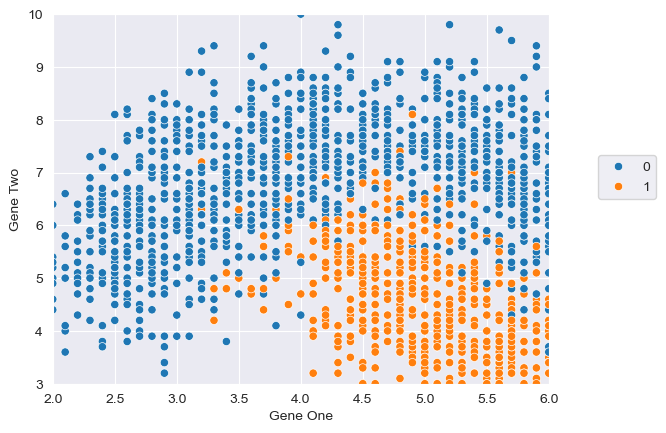

In [7]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present')
plt.xlim(2, 6)
plt.ylim(3, 10)
plt.legend(loc=(1.1, 0.5))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [19]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [20]:
full_test = pd.concat([X_test, y_test], axis=1)

In [21]:
full_test

,Gene One,Gene Two,Cancer Present
1801,7.7,4.1,1
1190,5.3,2.8,1
1817,8.9,4.2,1
251,3.3,5.7,0
2505,4.7,7.3,0
...,...,...,...
2443,5.0,6.1,1
856,2.3,4.6,0
1983,8.2,6.4,1
166,7.7,4.7,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

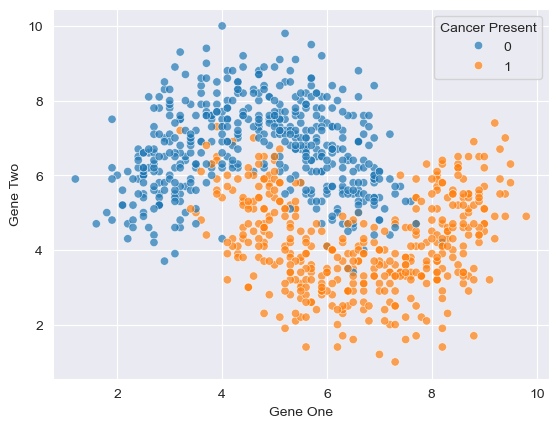

In [22]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

In [23]:
y_pred = knn_model.predict(scaled_X_test)

In [26]:
pd.DataFrame(data=y_pred, columns=['Predicted Cancer'])

,Predicted Cancer
0,1
1,1
2,1
3,0
4,0
...,...
895,0
896,0
897,1
898,1


In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [28]:
accuracy_score(y_test, y_pred)

0.9011111111111111

In [29]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



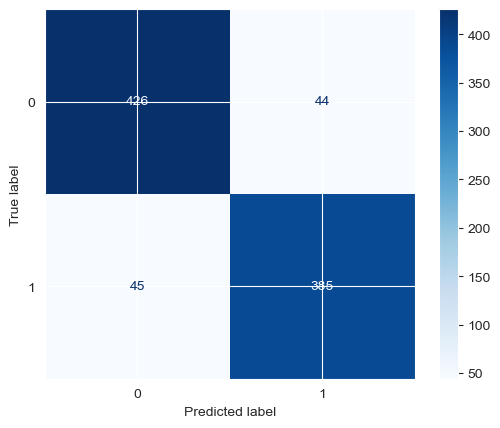

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

In [33]:
test_error_rates = []

for k in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

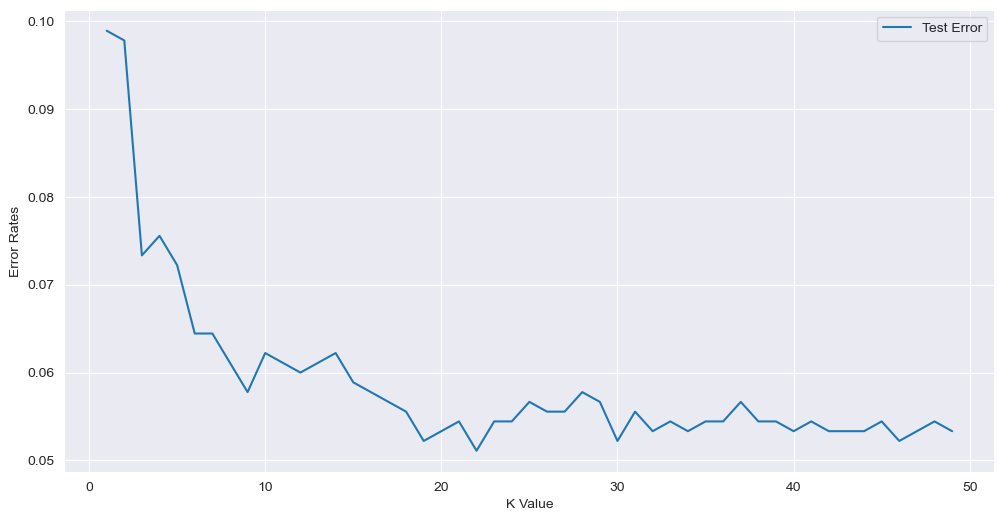

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error Rates')
plt.xlabel('K Value')

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsClassifier(n_jobs=-1)

In [38]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [39]:
operations = [('scaler', scaler), ('knn', knn)]

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipe = Pipeline(operations, verbose=True)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
k_values = list(range(1, 20))

In [44]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [45]:
param_grid = {'knn__n_neighbors': k_values}

In [46]:
full_cv_classifier = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [47]:
full_cv_classifier.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [48]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=16))],
 'verbose': True,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_jobs=-1, n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [49]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [50]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90761905, 0.92047619, 0.91285714, 0.92428571,
       0.92142857, 0.92761905, 0.9247619 , 0.9247619 , 0.92238095,
       0.92428571, 0.92571429, 0.92809524, 0.92857143, 0.92857143,
       0.93047619, 0.92857143, 0.92904762, 0.92809524])

In [51]:
scaler = StandardScaler()
knn14 = KNeighborsClassifier(n_neighbors=14)
operations = [('scaler', scaler), ('knn14', knn14)]

In [52]:
pipe = Pipeline(operations)

In [53]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [55]:
pipe_pred = pipe.predict(X_test)

In [56]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [57]:
single_sample = X_test.iloc[40]

In [58]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [59]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [60]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.92857143, 0.07142857]])